Column:  drug_name
1337
____________________________________________________________________________________________________
Column:  manufacturer
10
____________________________________________________________________________________________________
Column:  approval_year
35
____________________________________________________________________________________________________
Column:  drug_class
10
____________________________________________________________________________________________________
Column:  indications
10
____________________________________________________________________________________________________
Column:  side_effects
435
____________________________________________________________________________________________________
Column:  dosage_mg
99
____________________________________________________________________________________________________
Column:  administration_route
7
___________________________________________________________________________________________

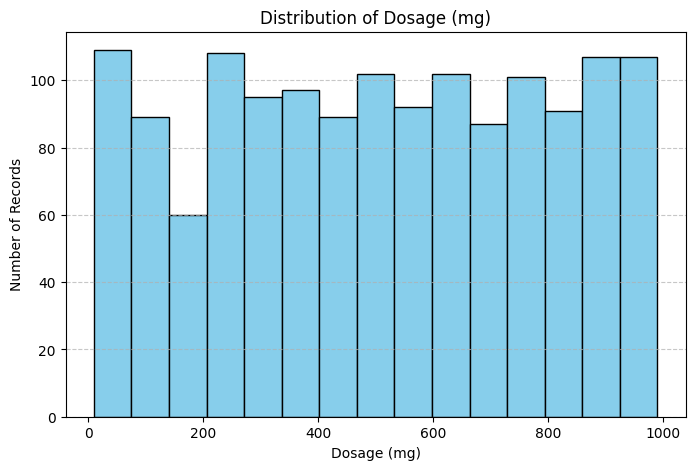

All columns: ['drug_name', 'manufacturer', 'approval_year', 'drug_class', 'indications', 'side_effects', 'dosage_mg', 'administration_route', 'contraindications', 'warnings', 'price_usd', 'batch_number', 'expiry_date', 'side_effect_severity', 'approval_status']


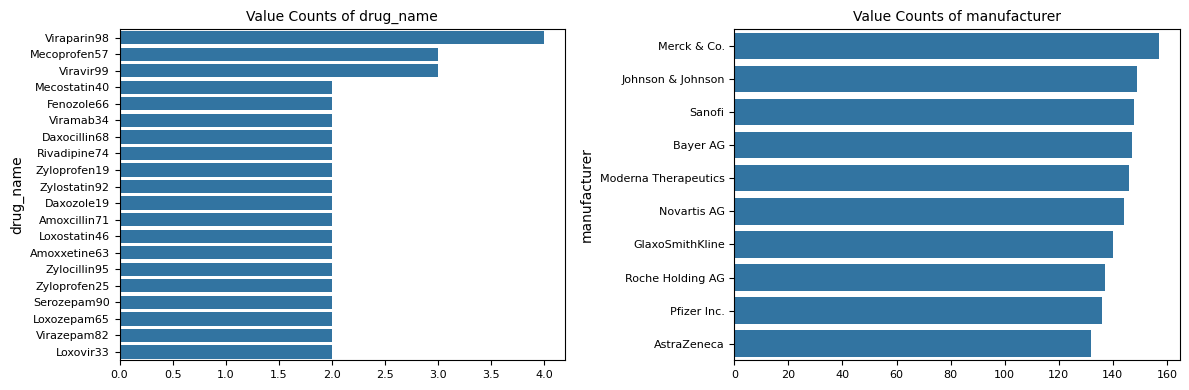

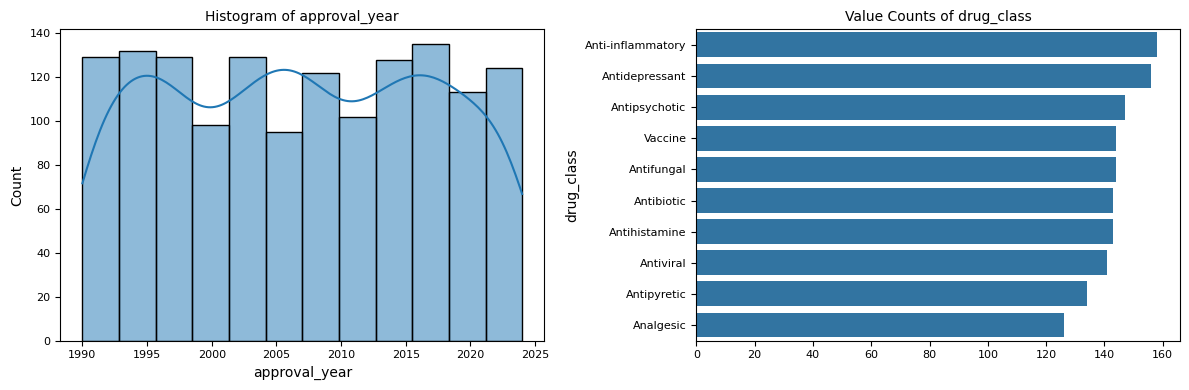

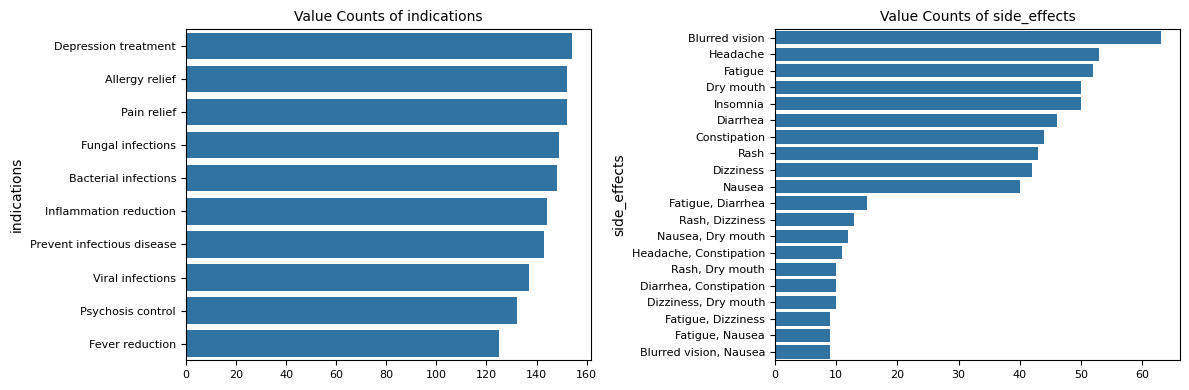

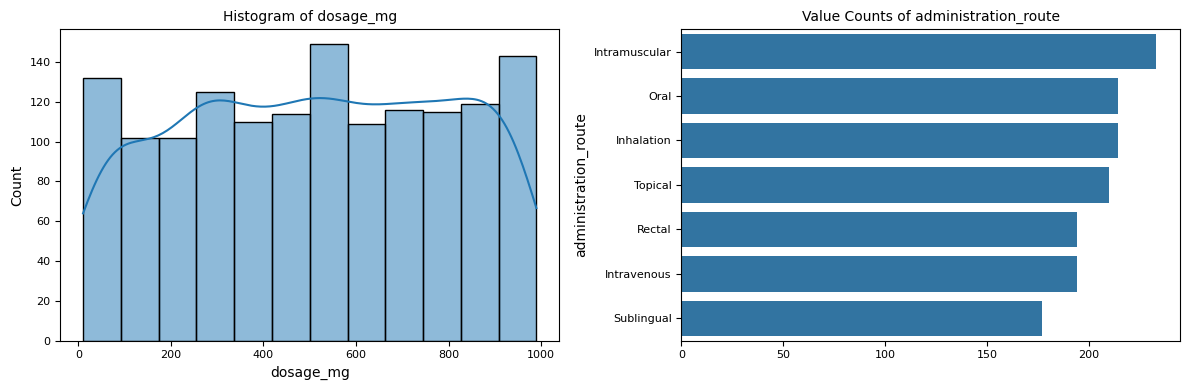

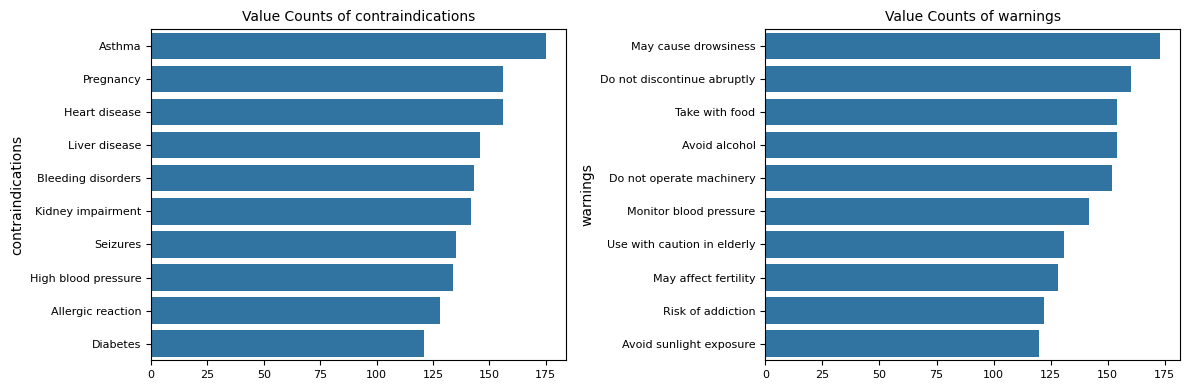

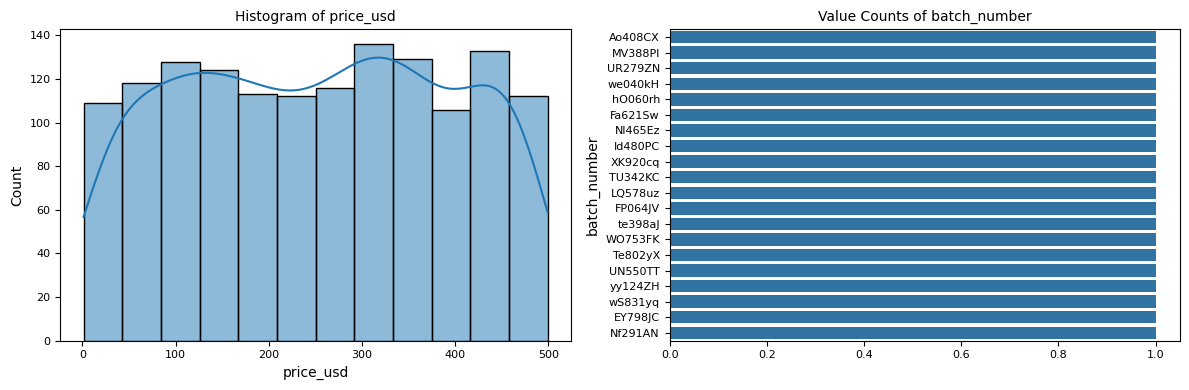

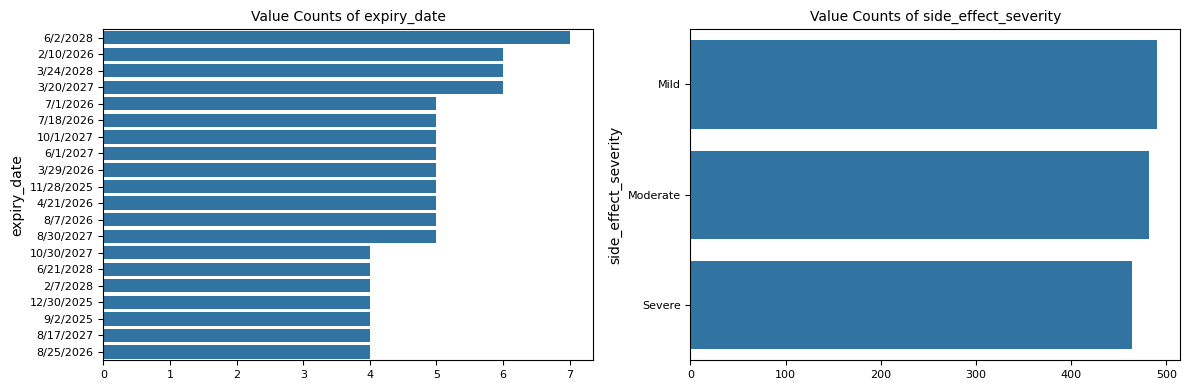

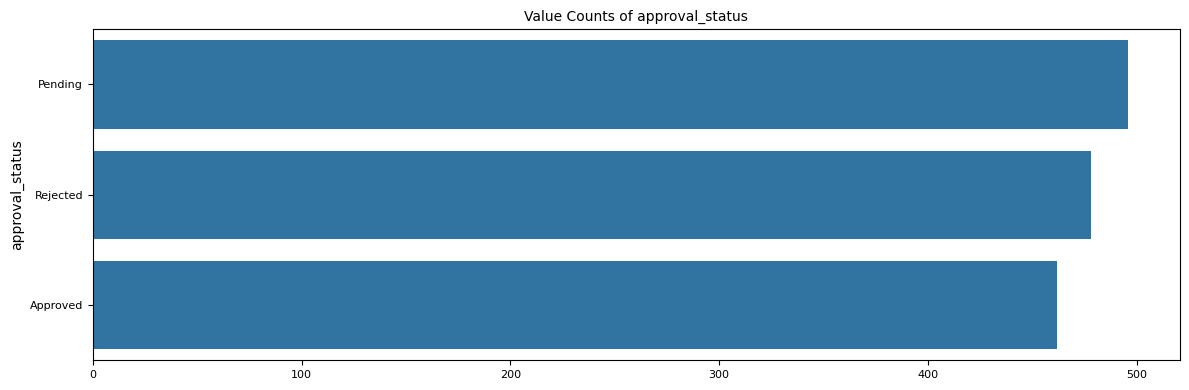

Categorical columns: ['drug_name', 'manufacturer', 'drug_class', 'indications', 'side_effects', 'administration_route', 'contraindications', 'warnings', 'batch_number', 'expiry_date', 'side_effect_severity', 'approval_status']


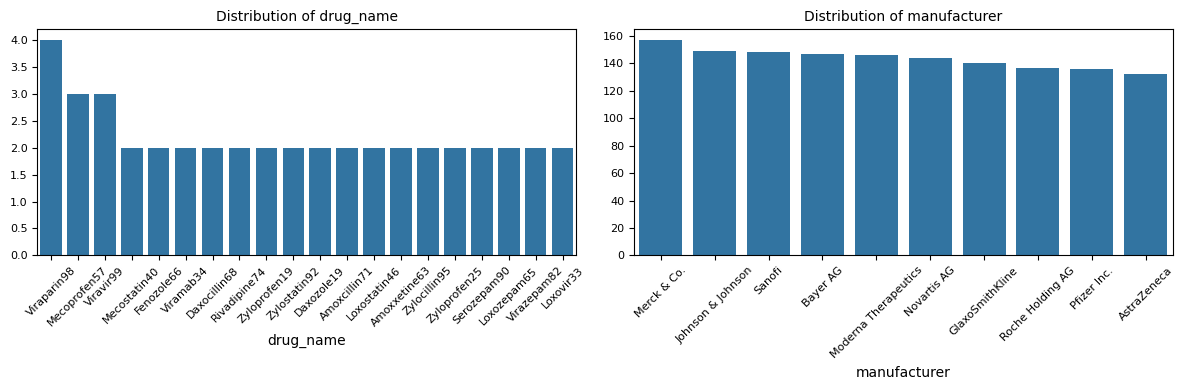

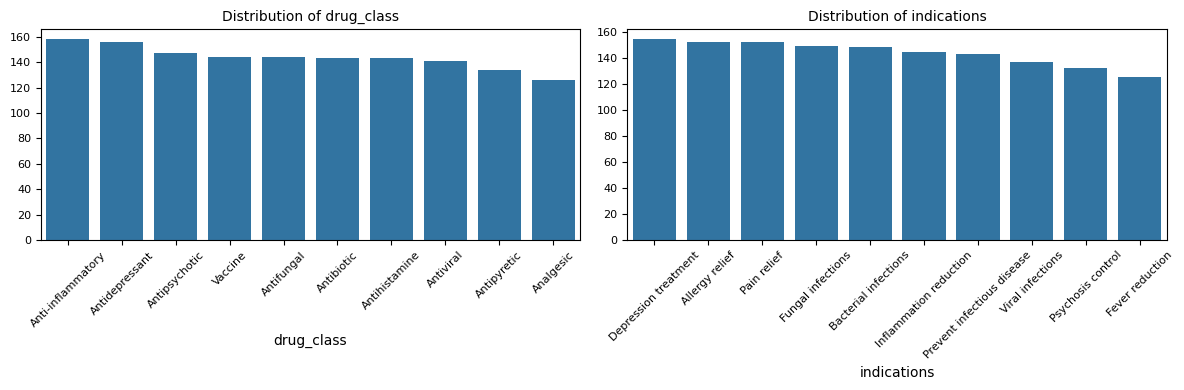

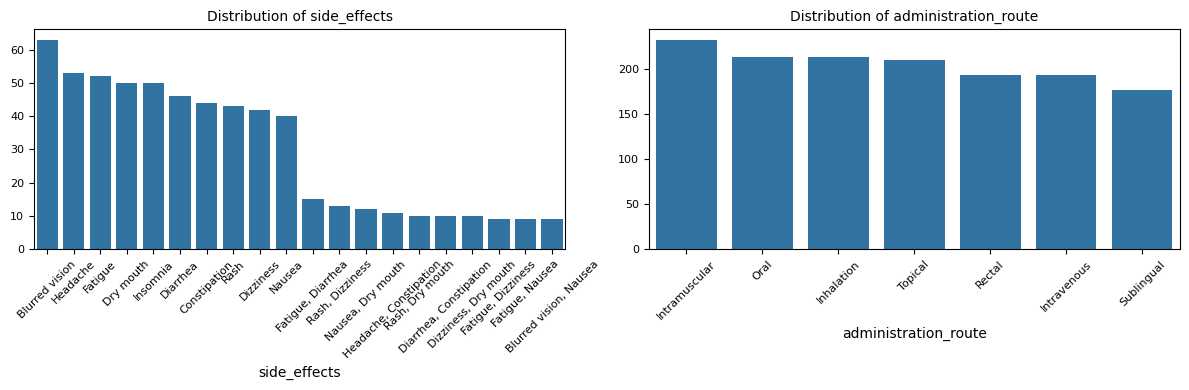

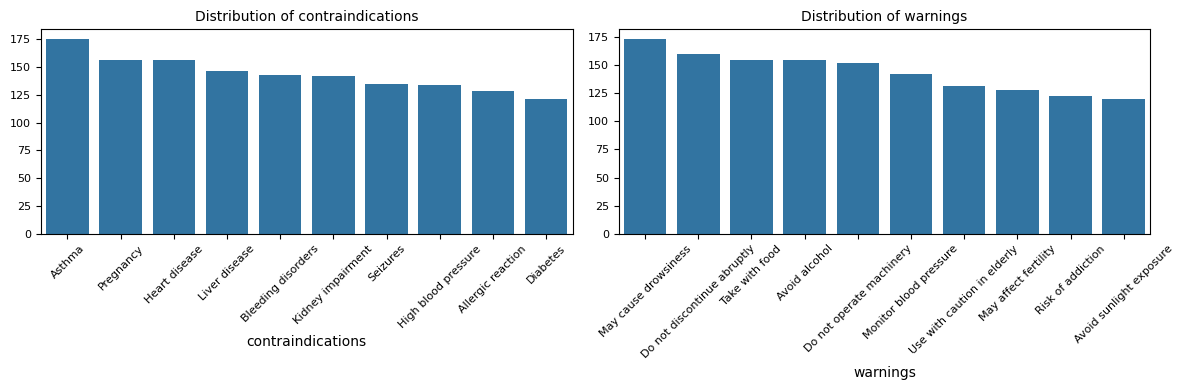

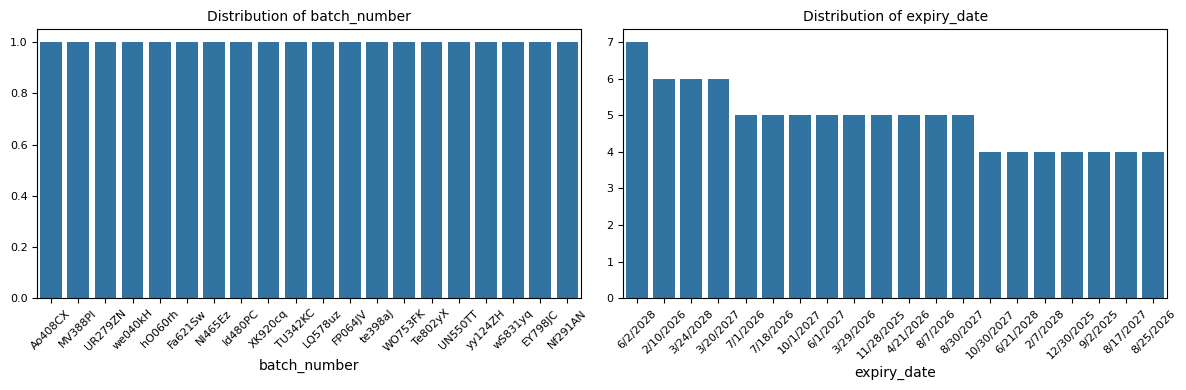

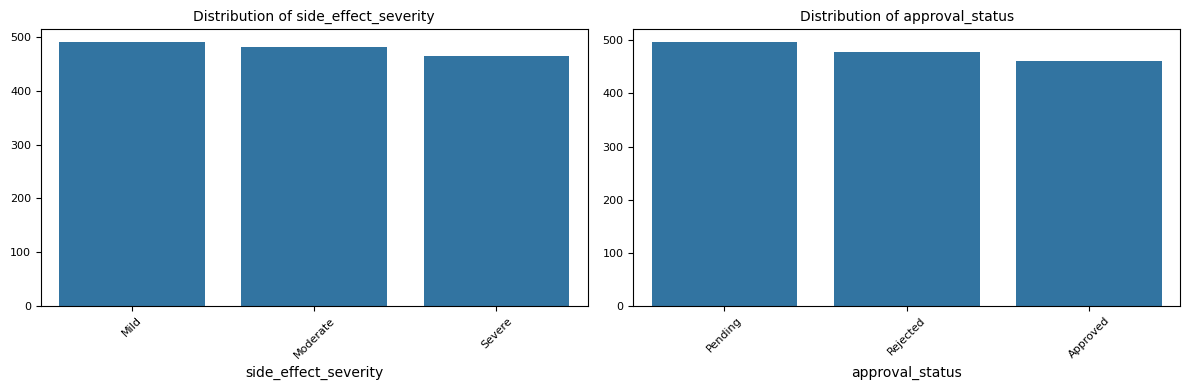

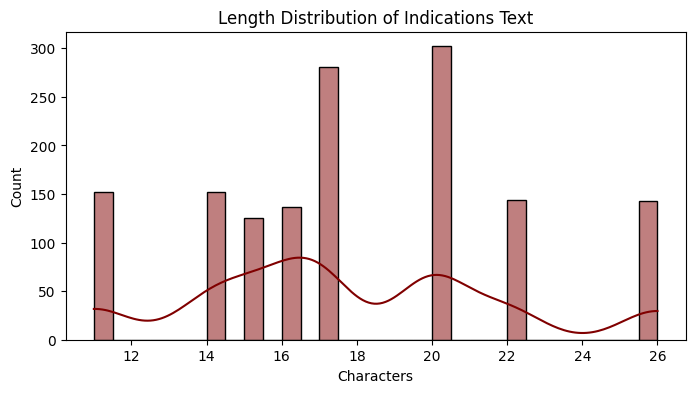


--- approval_year ---
Lower bound: 1971.0, Upper bound: 2043.0
Outliers found: 0

--- dosage_mg ---
Lower bound: -465.0, Upper bound: 1495.0
Outliers found: 0

--- price_usd ---
Lower bound: -236.23624999999998, Upper bound: 737.27375
Outliers found: 0


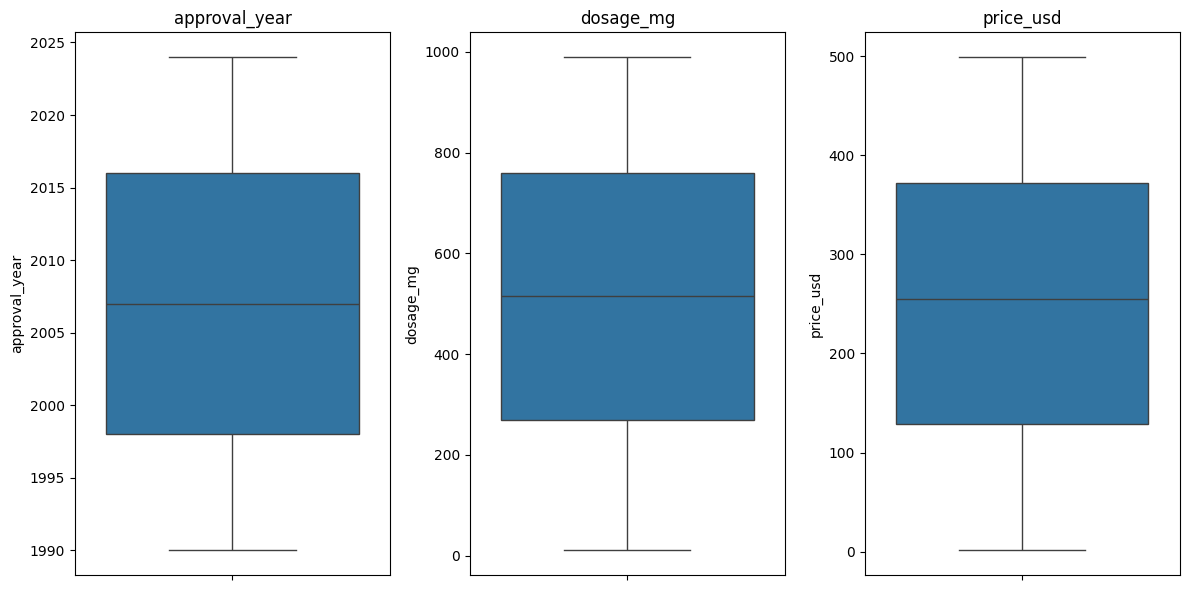

In [8]:
%run ./EDA.ipynb


Column:  drug_name
1337
____________________________________________________________________________________________________
Column:  manufacturer
10
____________________________________________________________________________________________________
Column:  approval_year
35
____________________________________________________________________________________________________
Column:  drug_class
10
____________________________________________________________________________________________________
Column:  indications
10
____________________________________________________________________________________________________
Column:  side_effects
435
____________________________________________________________________________________________________
Column:  dosage_mg
99
____________________________________________________________________________________________________
Column:  administration_route
7
___________________________________________________________________________________________

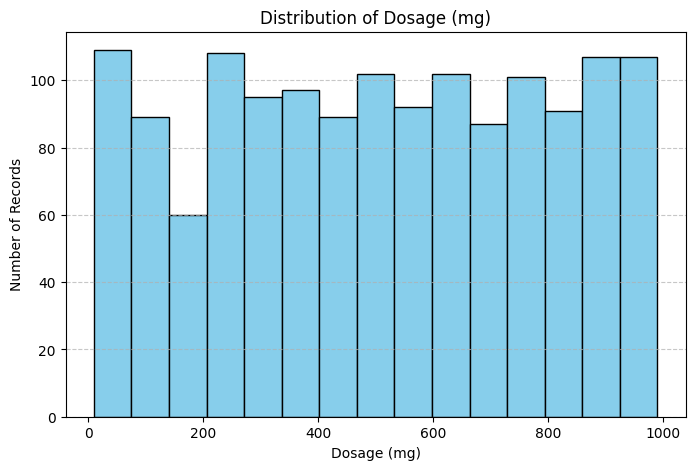

All columns: ['drug_name', 'manufacturer', 'approval_year', 'drug_class', 'indications', 'side_effects', 'dosage_mg', 'administration_route', 'contraindications', 'warnings', 'price_usd', 'batch_number', 'expiry_date', 'side_effect_severity', 'approval_status']


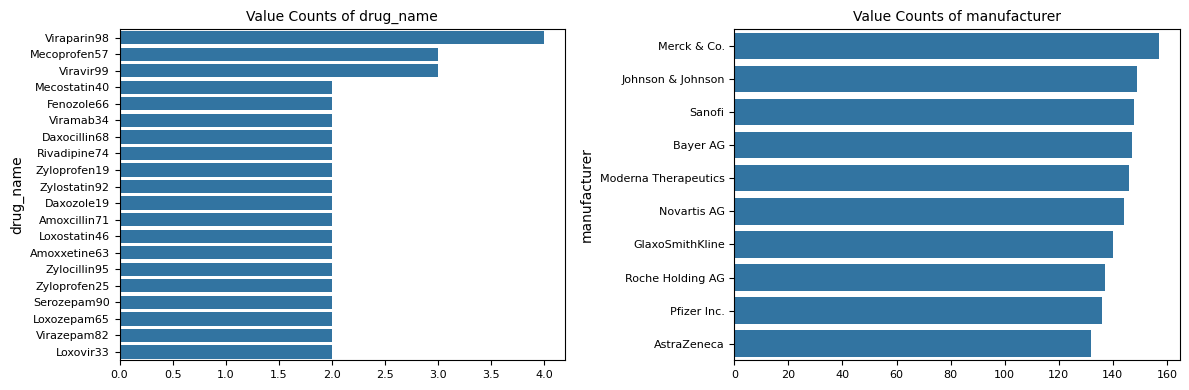

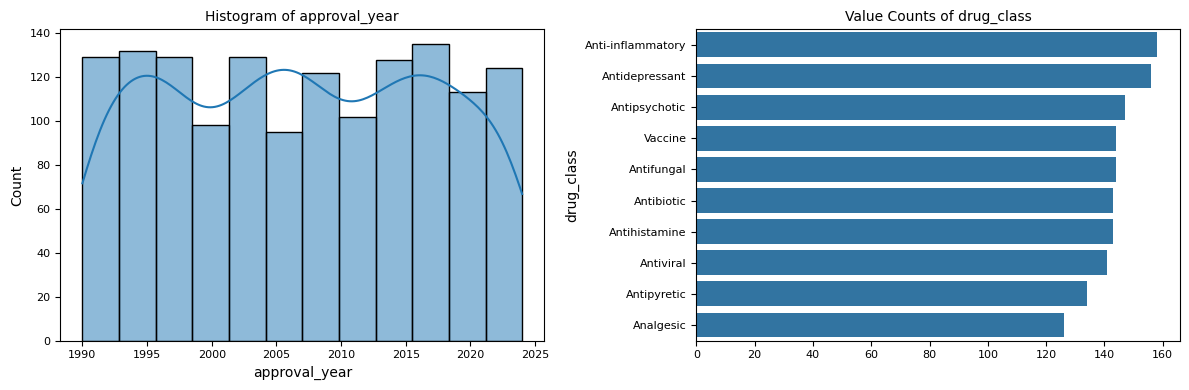

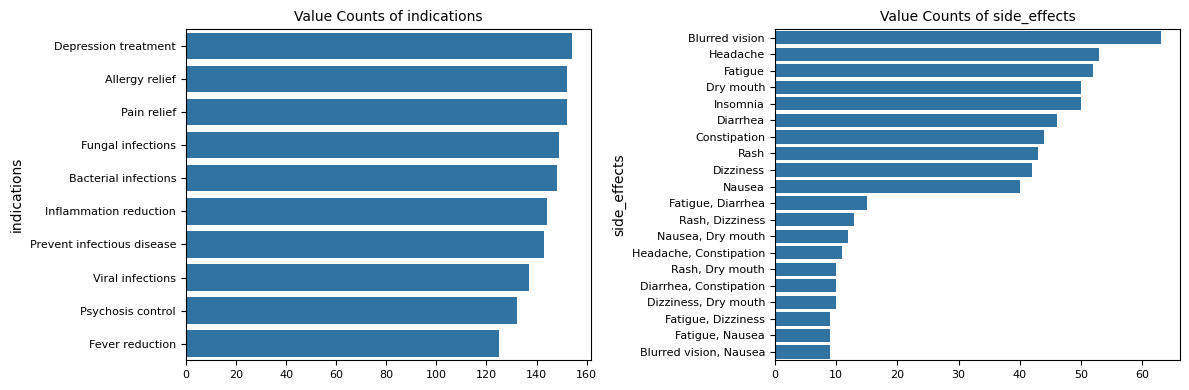

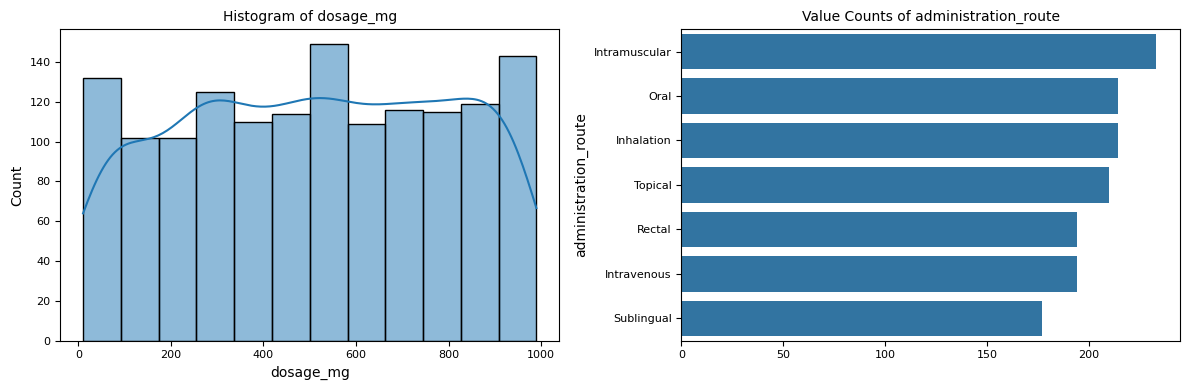

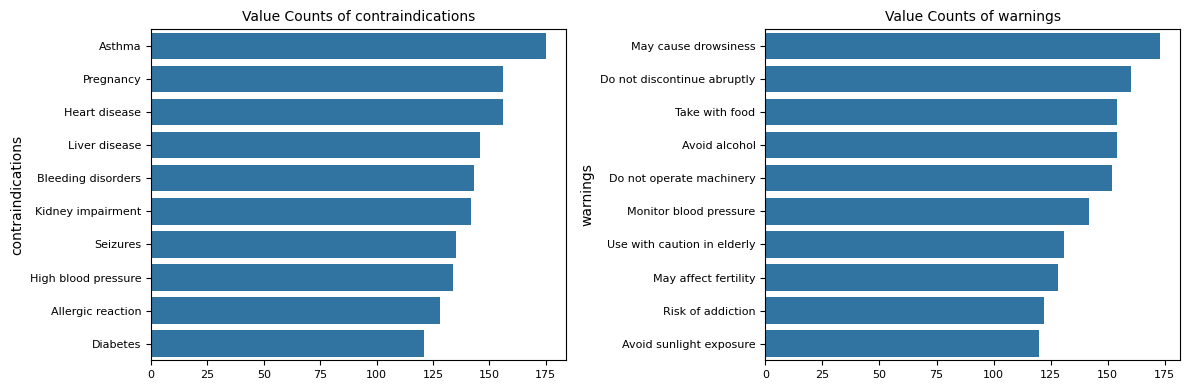

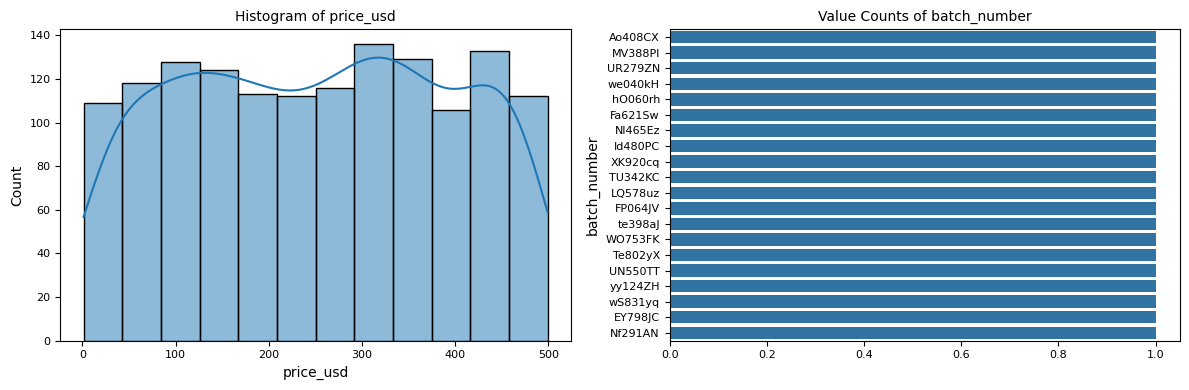

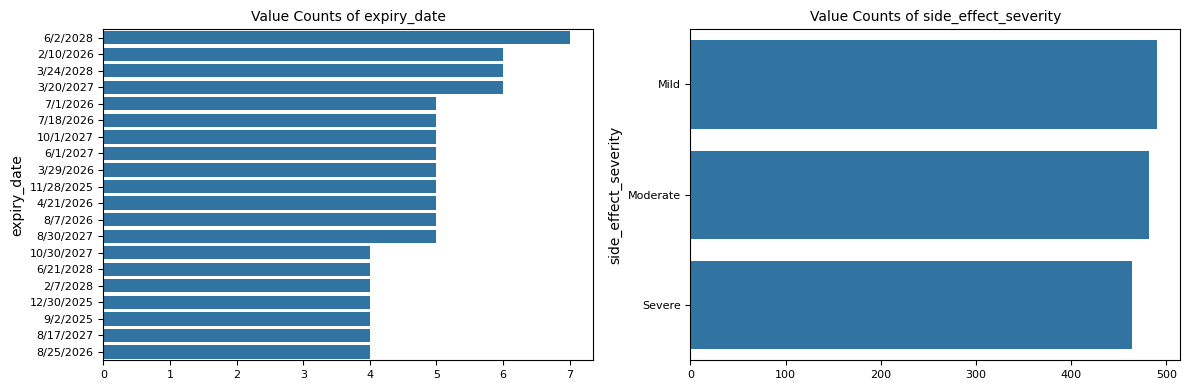

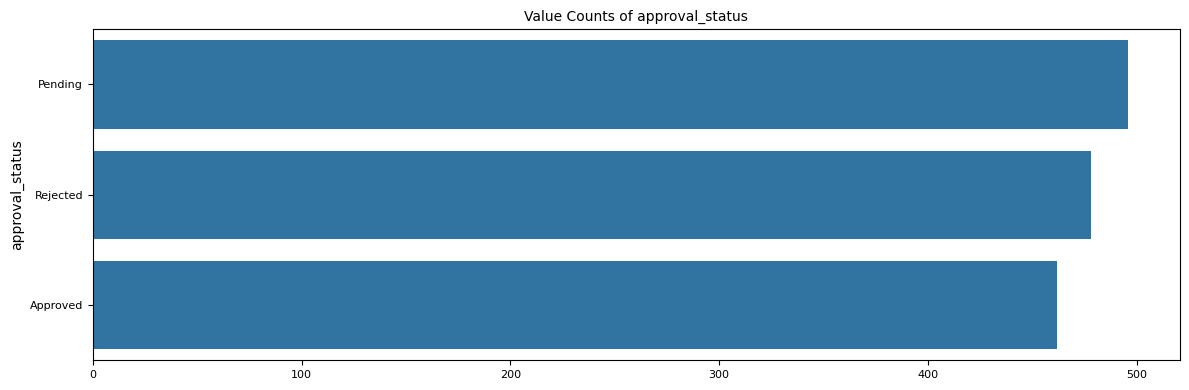

Categorical columns: ['drug_name', 'manufacturer', 'drug_class', 'indications', 'side_effects', 'administration_route', 'contraindications', 'warnings', 'batch_number', 'expiry_date', 'side_effect_severity', 'approval_status']


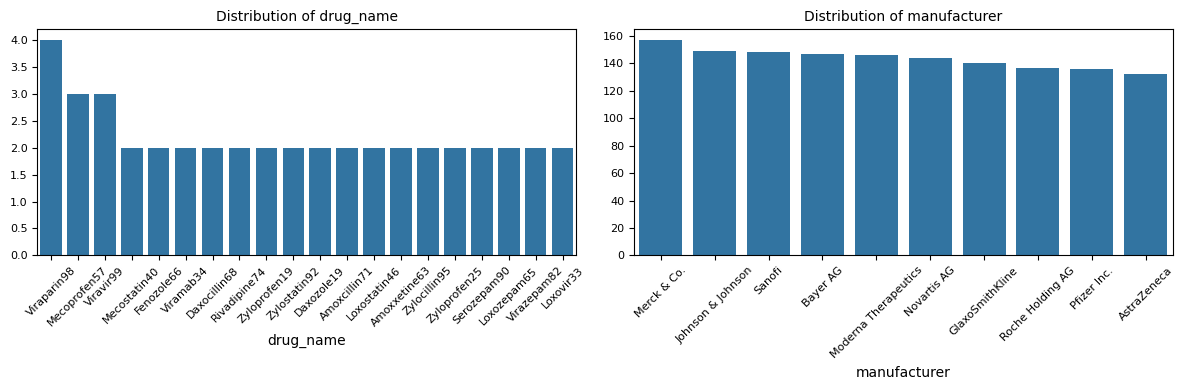

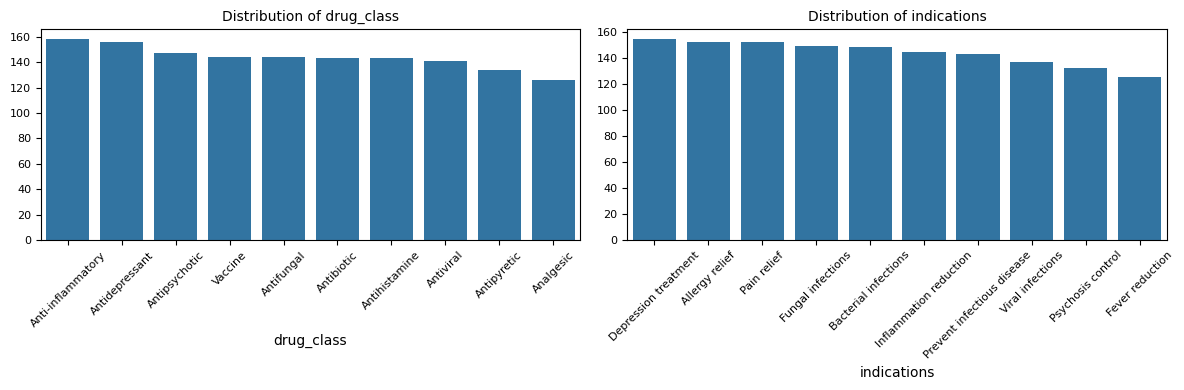

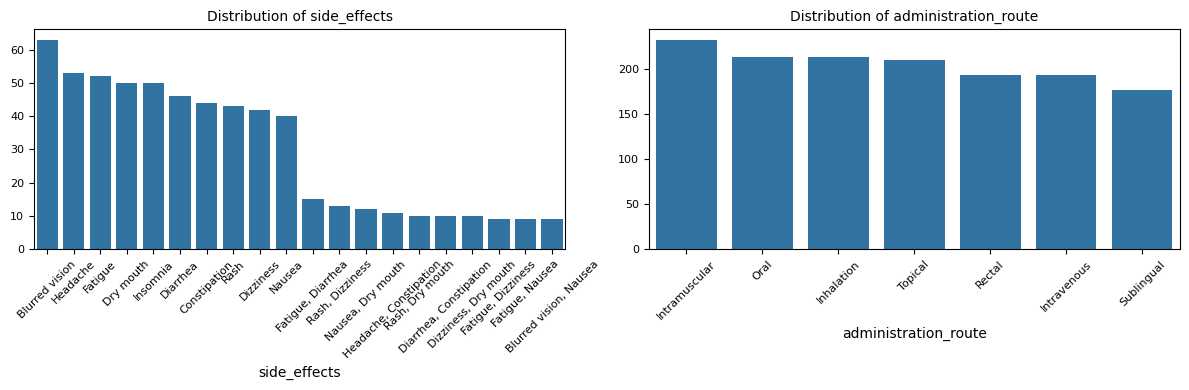

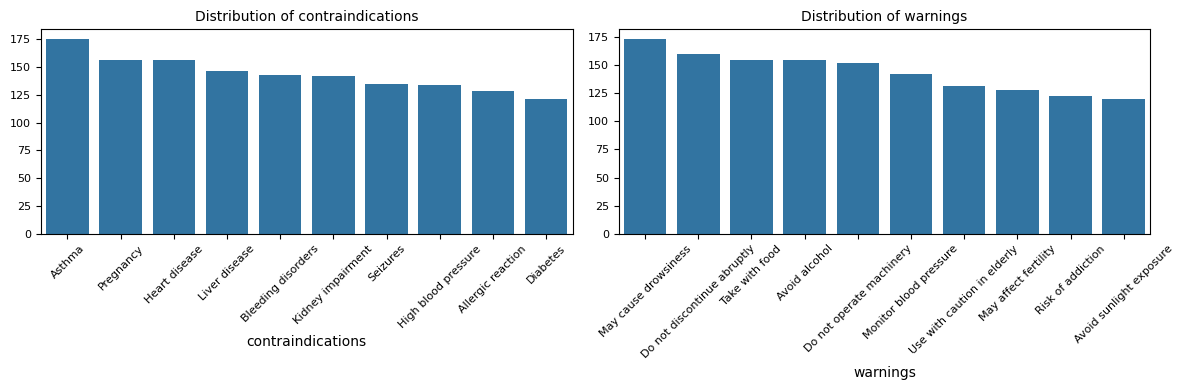

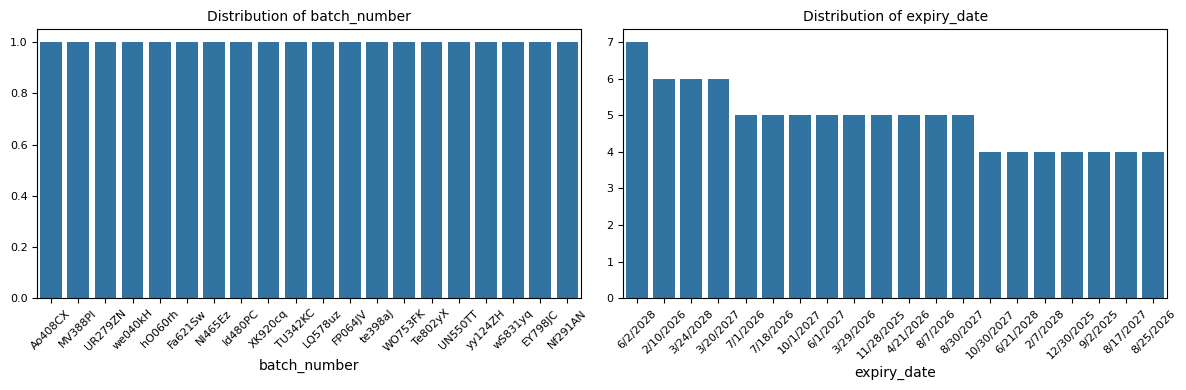

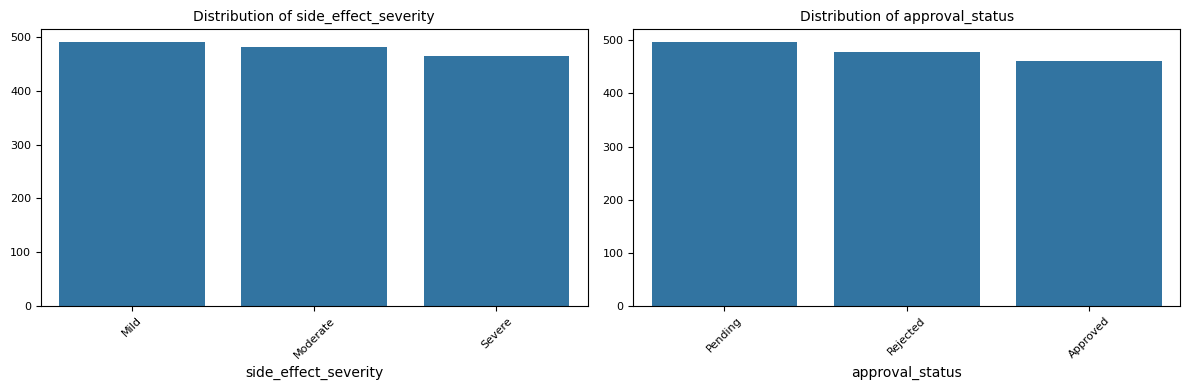

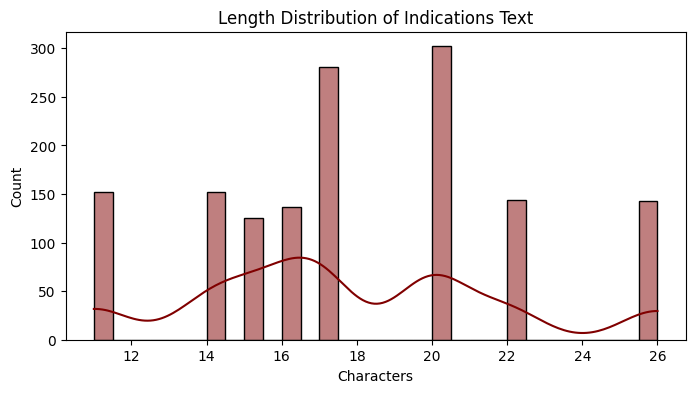


--- approval_year ---
Lower bound: 1971.0, Upper bound: 2043.0
Outliers found: 0

--- dosage_mg ---
Lower bound: -465.0, Upper bound: 1495.0
Outliers found: 0

--- price_usd ---
Lower bound: -236.23624999999998, Upper bound: 737.27375
Outliers found: 0


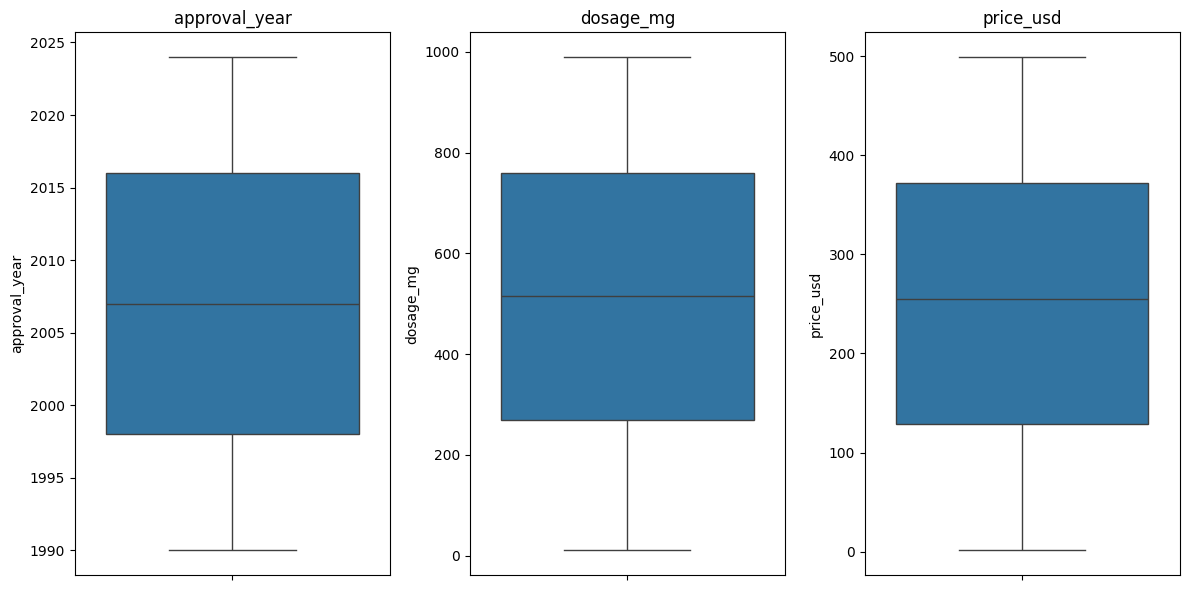

  expiry_date  days_until_expiry
0  2026-11-29                453
1  2027-07-14                680
2  2028-06-02               1004
3  2026-07-07                308
4  2027-12-28                847


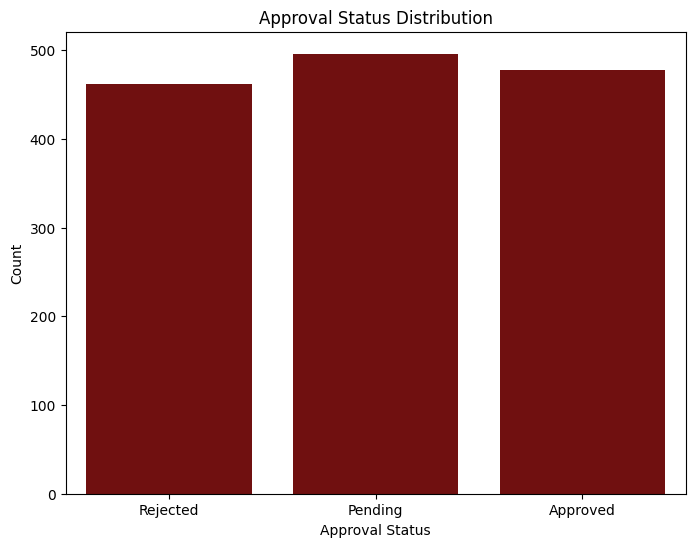

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   dosage_mg                              1436 non-null   int64  
 1   days_until_expiry                      1436 non-null   int64  
 2   approval_status_Approved               1436 non-null   float64
 3   approval_status_Pending                1436 non-null   float64
 4   approval_status_Rejected               1436 non-null   float64
 5   contraindications_Allergic reaction    1436 non-null   float64
 6   contraindications_Asthma               1436 non-null   float64
 7   contraindications_Bleeding disorders   1436 non-null   float64
 8   contraindications_Diabetes             1436 non-null   float64
 9   contraindications_Heart disease        1436 non-null   float64
 10  contraindications_High blood pressure  1436 non-null   float64
 11  cont

In [9]:
%run ./Preprocessing.ipynb


# Training-testing model


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


pandas: handling your dataset.

train_test_split: split data into training and test sets.

RandomForestClassifier: the model you’re using.

accuracy_score, classification_report, confusion_matrix: metrics to evaluate the model.

seaborn & matplotlib: for plotting the confusion matrix nicely.

In [11]:
X = df_final.drop("severity_encoded",  axis=1)  # all features
y = df_final["severity_encoded"]               # target (0,1,2)


- X: all input features except the target (severity_encoded).

- y: the target variable, which is ordinally encoded severity: 0=Mild, 1=Moderate, 2=Severe.

- This is multiclass classification because there are 3 classes.

In [13]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   dosage_mg                              1436 non-null   int64  
 1   days_until_expiry                      1436 non-null   int64  
 2   approval_status_Approved               1436 non-null   float64
 3   approval_status_Pending                1436 non-null   float64
 4   approval_status_Rejected               1436 non-null   float64
 5   contraindications_Allergic reaction    1436 non-null   float64
 6   contraindications_Asthma               1436 non-null   float64
 7   contraindications_Bleeding disorders   1436 non-null   float64
 8   contraindications_Diabetes             1436 non-null   float64
 9   contraindications_Heart disease        1436 non-null   float64
 10  contraindications_High blood pressure  1436 non-null   float64
 11  cont

In [14]:
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols)  # one-hot encoding


- Finds all categorical columns (dtype=object).

- Converts them to one-hot encoded columns (0/1 for each category).

- Why? Random Forest can’t handle strings directly; it needs numeric input.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


- Splits data into 80% train, 20% test.

- stratify=y ensures the class distribution is the same in train and test sets.

- random_state=42 fixes the split for reproducibility.

In [17]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

- n_estimators=100: builds 100 trees in the forest.

- class_weight='balanced': automatically adjusts for class imbalance (important if you have many mild vs few severe cases).

- fit(): trains the model on the training data.

In [19]:
!pip install imbalanced-learn


In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train.value_counts())

After SMOTE: severity_encoded
1.0    392
0.0    392
2.0    392
Name: count, dtype: int64


#### Insight / Why it matters:

- ML models are biased toward majority classes if the data is imbalanced.

- SMOTE improves recall and F1-score for the minority class.

- Helps the model see more representative examples of underrepresented classes.

- Caution: Can create synthetic points that may not perfectly reflect real data — evaluate with metrics like precision, recall, F1, ROC-AUC, not just accuracy.

In [21]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.3229166666666667

Classification Report:
               precision    recall  f1-score   support

         0.0       0.38      0.41      0.39        98
         1.0       0.30      0.26      0.28        97
         2.0       0.28      0.30      0.29        93

    accuracy                           0.32       288
   macro avg       0.32      0.32      0.32       288
weighted avg       0.32      0.32      0.32       288



### Observations from the output:

- Accuracy: 0.3229 → model predicts correctly ~32% of the time.

- Classification report:

    - Precision: measures how many predicted positives are correct.

        - 0 → 0.38, 1 → 0.30, 2 → 0.28

    - Recall: measures how many actual positives are correctly predicted.

        - 0 → 0.41, 1 → 0.26, 2 → 0.30

    - F1-score: harmonic mean of precision and recall, reflects balance.

        - 0 → 0.39, 1 → 0.28, 2 → 0.29

    - Support: number of samples per class.

        - Classes 0, 1, 2 have ~93–98 samples each.

### Insights:

- Accuracy of 32% is very low, close to random guessing (1/3 ≈ 33% for 3 classes).

- Class 0 performs slightly better than 1 and 2; model is biased toward class 0.

- Weighted and macro averages are also low (~0.32), confirming overall poor performance.

- Likely causes:

    - Model is too simple or not tuned.

- Features may lack predictive power for this target.

- Class imbalance or small dataset per class could affect learning.

- Recommendations:

    - Try tree-based models (Random Forest, XGBoost) which handle categorical/encoded features better.

    - Hyperparameter tuning and cross-validation.

    - Check if features correlate with target; consider feature engineering.

    - If ordinal encoding was used, consider one-hot encoding if model interprets ordinal numbers as numeric magnitude incorrectly.



In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[40 25 33]
 [34 25 38]
 [31 34 28]]


### Code Explanation

- from sklearn.metrics import confusion_matrix → imports the function to compute the confusion matrix.

- cm = confusion_matrix(y_test, y_pred) → computes a matrix showing counts of actual vs. predicted class labels.

- print(cm) → displays the confusion matrix in the console.

- Each row corresponds to actual class, and each column corresponds to predicted class.

- Diagonal elements represent correct predictions, off-diagonal elements represent misclassifications.

### Insights

- The model predicts correctly only a small fraction of samples per class.

- Class 0 is predicted slightly better (40 correct) than classes 1 (25 correct) and 2 (28 correct).

- High off-diagonal values indicate frequent misclassifications, showing poor class separation.

- Overall accuracy (~32%) is low, suggesting the model is underfitting or features are weak.

- Model struggles to distinguish between all three classes; improvement is needed through stronger models, feature engineering, or hyperparameter tuning.

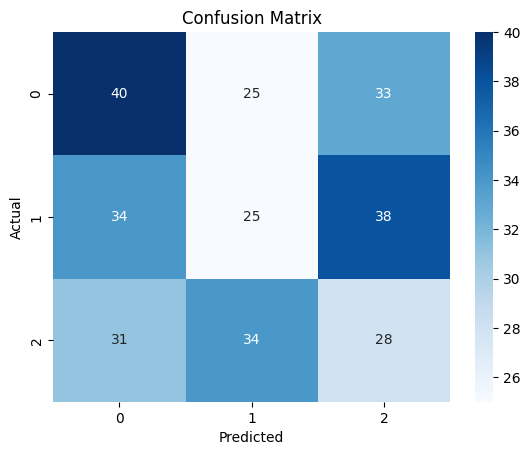

In [23]:
labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Code Explanation:

- labels = [0, 1, 2] → defines the class labels for the confusion matrix.

- cm = confusion_matrix(y_test, y_pred, labels=labels) → computes the confusion matrix, which shows how many samples of each actual class were predicted as each class.

- sns.heatmap(...) → visualizes the confusion matrix as a heatmap.

- annot=True → writes the numbers in each cell.

- fmt='d' → displays numbers as integers.

- cmap='Blues' → colors the heatmap in blue shades.

- xticklabels & yticklabels → label the axes with class names.

- plt.xlabel, plt.ylabel, plt.title → add labels and a title to the plot.

- plt.show() → displays the heatmap.

### Insights:

- The confusion matrix shows which classes the model confuses most.

- Diagonal numbers are correct predictions; off-diagonal numbers are misclassifications.

- With your current low accuracy (~35%), expect most predictions to be off-diagonal, meaning the model is failing to correctly classify most instances.

- Visualizing this helps identify specific class pairs that are being confused, which can guide feature engineering or class balancing strategies.

In [24]:
for col in X.columns:
    correlation = pd.concat([X[col], y], axis=1).corr().iloc[0,1]
    print(f"{col}: {correlation}")


dosage_mg: -0.023816552542812595
days_until_expiry: -6.608621925372958e-06
approval_status_Approved: -0.04872636735529591
approval_status_Pending: 0.04669312855100516
approval_status_Rejected: 0.0011870989514546247
contraindications_Allergic reaction: -0.0170426479379941
contraindications_Asthma: 0.02917624600365523
contraindications_Bleeding disorders: 0.013097062622071769
contraindications_Diabetes: -0.005565950706517294
contraindications_Heart disease: -0.005974471748635457
contraindications_High blood pressure: 0.02475615821879921
contraindications_Kidney impairment: -0.06134796823525326
contraindications_Liver disease: -0.015146900172400491
contraindications_Pregnancy: 0.021488208888498086
contraindications_Seizures: 0.013013887195799207
drug_class_encoded: -0.021173109402860667
indications_encoded: 0.025298577537695835
warnings_encoded: 0.029345739145866648


In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: severity_encoded
1.0    392
0.0    392
2.0    392
Name: count, dtype: int64
After SMOTE: severity_encoded
1.0    392
0.0    392
2.0    392
Name: count, dtype: int64


### 🔎 Code Explanation

- SMOTE(random_state=42)
Creates a SMOTE object with reproducibility via a random seed.
SMOTE generates synthetic samples of minority classes by interpolating between existing data points.

- smote.fit_resample(X_train, y_train)

    - Takes your training data (X_train, y_train).

    - Creates new synthetic examples for under-represented classes.

    - Returns balanced training data: X_train_res, y_train_res.

- print(...) before and after
Shows the class distribution before and after balancing.

### 📊 Insights

- Before SMOTE:

    - Class 0.0 → 392 samples

    - Class 1.0 → 385 samples

    - Class 2.0 → 371 samples
    👉 The dataset is slightly imbalanced (not extreme, but class 2.0 had fewer samples).

- After SMOTE:

    - Class 0.0 → 392

    - Class 1.0 → 392

    - Class 2.0 → 392
    - 👉 SMOTE upsampled the minority classes to match the majority (392 each).
    Now your training data is perfectly balanced.

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())


Cross-validation scores: [0.34722222 0.32404181 0.36236934 0.32055749 0.33101045]
Average CV score: 0.33704026325977543


### Code explanation:

- cross_val_score performs 5-fold cross-validation.

- The dataset is split into 5 parts; the model trains on 4 parts and tests on 1, repeating 5 times.

- Returns 5 accuracy scores, one for each fold.

- .mean() calculates the average accuracy across all folds for a robust performance estimate.

### 📊Insight:

- CV scores [0.316, 0.341, 0.376, 0.366, 0.310] are low and inconsistent.

- Average CV score ≈ 0.342, meaning the model predicts correctly ~34% of the time.

- Indicates the model struggles with patterns in the data.

- Possible issues: noisy data, irrelevant features, or class imbalance.

- Random Forest alone isn’t capturing the patterns effectively.